<a href="https://colab.research.google.com/github/veetwt/Aula.RegressaoLinear/blob/main/Aula_Regress%C3%A3oLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



# REGRESSÃO LINEAR SIMPLES


---

Utilizando análise preditiva para determinar o limite de empréstimo com base na feature "salário" fornecida.

# IMPORTAÇÃO LIBS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('BaseDados_RegressaoLinear.xlsx', 'Plan1')
df.head()

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000


In [ ]:
df.shape

(99, 2)

In [ ]:
df.tail(15)

,Salario,Limite_Emprestimo
84,2883.908902,6689.782736
85,2912.747991,6756.680564
86,2941.875471,6824.247369
87,2971.294226,6892.489843
88,3001.007168,6961.414742
89,3031.017240,7031.028889
90,3061.327412,7101.339178
91,3091.940686,7172.352570
92,3122.860093,7208.214332
93,3154.088694,7244.076095


In [ ]:
df.columns

Index(['Salario', 'Limite_Emprestimo'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df.describe()

,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910


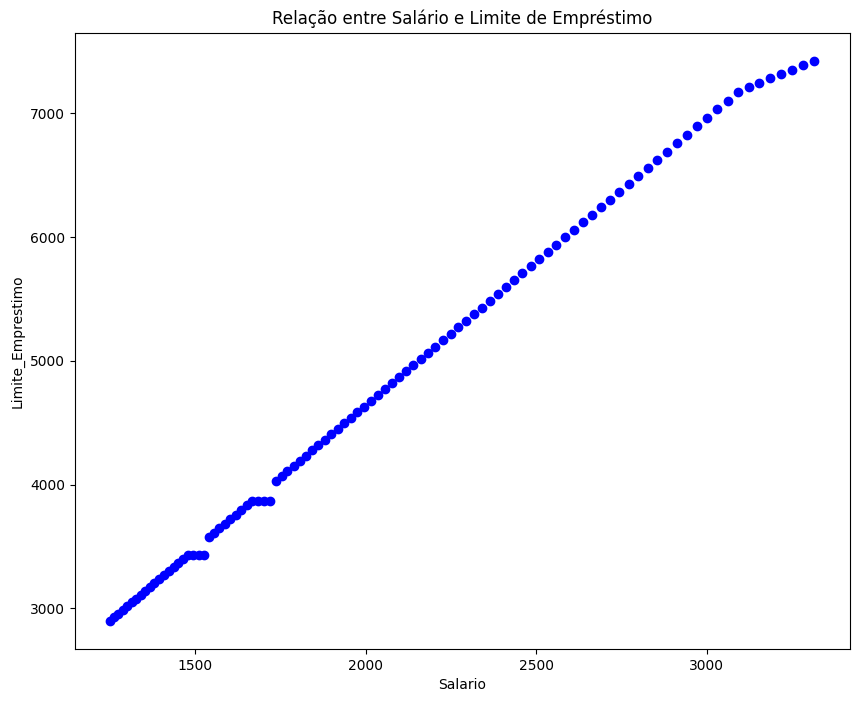

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Salario'], df['Limite_Emprestimo'], color='blue', marker='o')

plt.xlabel('Salario')
plt.ylabel('Limite_Emprestimo')

plt.title('Relação entre Salário e Limite de Empréstimo')

plt.show()

o gráfico mostra uma reta coerente e não há pontos que se afastem drasticamente dessa linha de tendência, então é provável que os dados não contenham outliers significativos que possam distorcer a análise.

In [ ]:
df.isnull().sum()

,0
Salario,0
Limite_Emprestimo,0


In [ ]:
df.duplicated().sum()

0

# ANÁLISE EXPLORATÓRIA DE DADOS E SELEÇÃO DA FEATURE

• Mínimo: é o menor valor.

• Primeiro quartil (Q1 ou Percentil 25): 25% dos dados são menores que ou iguais a este valor.

• Segundo quartil (Q2 ou Percentil 50): corresponde ao valor central de um conjunto de valores ordenado, sendo uma medida de tendência central. 50% dos dados são menores que ou iguais a este valor.

• Terceiro quartil (Q3 ou Percentil 75): 75% dos dados são menores que ou iguais a este valor.

• Máximo: é o maior valor.

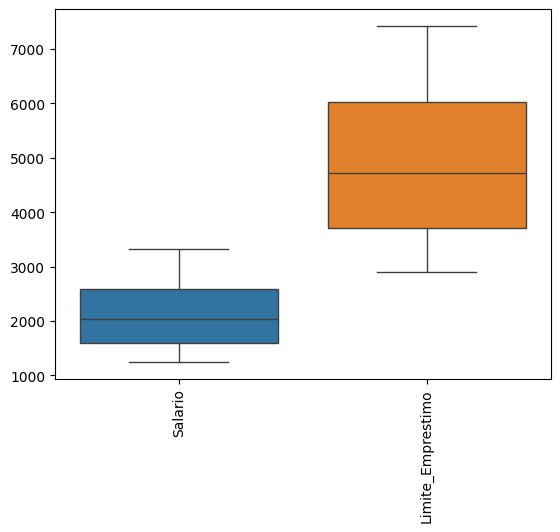

In [ ]:
#outliers
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

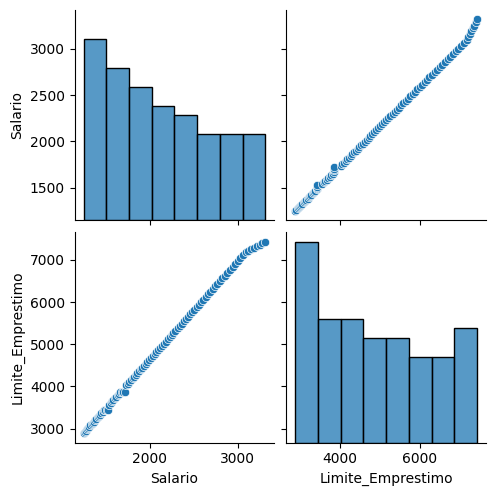

In [ ]:
#relacionando duas colunas
sns.pairplot(df)
plt.show()

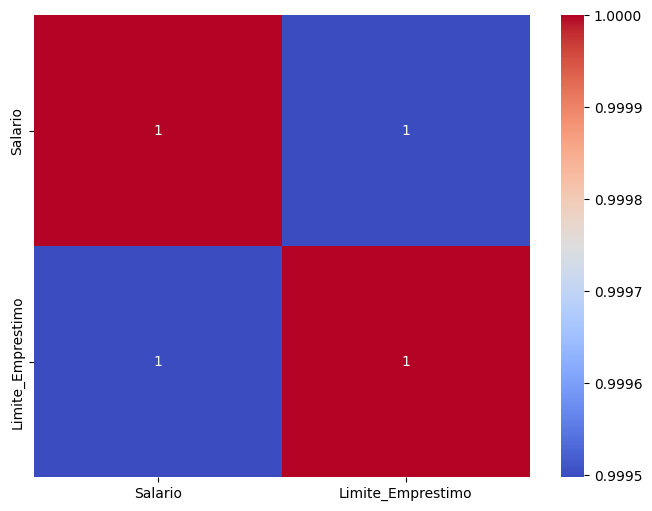

In [ ]:
#regressão: importante ver se há correlação entre os dados
correlacao = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.show()


Como interpretar?

Intervalo de valores: A correlação é medida por um coeficiente que varia de -1 a 1.

1: Correlação perfeita positiva. Isso significa que à medida que uma variável aumenta, a outra também aumenta de forma proporcional.
0: Nenhuma correlação. Isso significa que as variáveis não têm uma relação linear aparente.

-1: Correlação perfeita negativa. Isso significa que à medida que uma variável aumenta, a outra diminui de forma proporcional.

# DIVISÃO DOS DADOS E AVALIAÇÃO DO MODELO

In [ ]:
x = df[['Salario']]  # Variável independente
y = df['Limite_Emprestimo']  # Variável dependente contínua

# Dividir os dados em conjunto de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # 20% será para teste

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(x_train, y_train)

# Fazer previsões
y_pred = model.predict(x_test)

# Avaliar o modelo
variance = np.var(y_test)
print(f'Variância dos Valores Reais: {variance}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

# Exibir os coeficientes do modelo
print(f'Coeficiente: {model.coef_[0]}')
print(f'Intercepto: {model.intercept_}')

Variância dos Valores Reais: 2140822.5477010435
Mean Squared Error: 2934.203325727432
R² Score: 0.9986294037640446
Coeficiente: 2.2982114768373045
Intercepto: 33.04250964943094


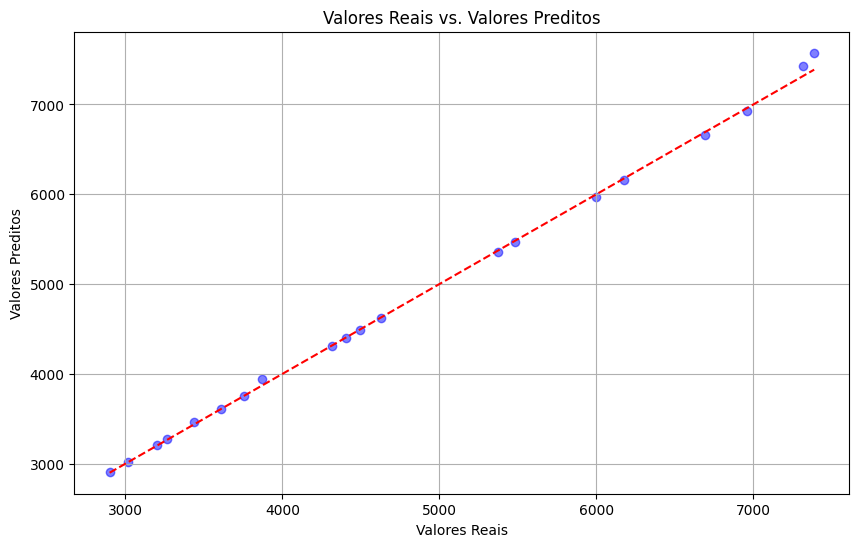

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linha de referência
plt.grid(True)
plt.show()

In [ ]:
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 54.168287085041115


# INTERPRETAÇÃO DOS RESULTADOS

O R² Score muito alto sugere que o modelo está explicando quase toda a variabilidade dos limites de crédito com base no salário.
O MSE e o RMSE são relativamente baixos, indicando que os erros do modelo são pequenos.
O coeficiente e o intercepto estão alinhados com a relação esperada entre salário e limite de crédito.

A raiz quadrada de 2140822.55 é aproximadamente 1463.95.
RMSE: 54.17